# nlp100 chapter10

Try:http://www.cl.ecei.tohoku.ac.jp/nlp100

## 90. word2vecによる学習

In [1]:
from gensim.models import word2vec

data = word2vec.Text8Corpus('data/80.txt')
model = word2vec.Word2Vec(data, size=300)
voc = model.wv.vocab.keys()

with open('data/90.txt', 'w') as writer:
    for x in voc:
        writer.write(x)
        for y in model[x]:
            writer.write(' '+str(y))
        writer.write('\n')

## 91. アナロジーデータの準備

In [2]:
import re

with open('data/91.txt', 'w') as writer:
    with open('data/questions-words.txt') as reader:
        family = False
        for line in reader:
            string = re.split(" ",line[:-1])
            if string[0] == ":":
                if string[1] == "family":
                    family = True
                else:
                    family = False
            if family == True:
                writer.write(line)

## 92. アナロジーデータへの適用

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import copy


def getallvec():
    vecdict = {}
    with open('data/85vec.txt') as reader:
        for line in reader:
            string1 = re.split(" ", line[:-1])
            a = [float(x) for x in string1[1:301]]
            vecdict[string1[0]] = copy.deepcopy(np.array(a))
    return vecdict


def getsim(v, worddict, writer): #類似度計算
    string = ''
    cos_sim1 = 0
    for k, v1 in worddict.items():
        npe = v1
        cos_sim2 = cosine_similarity(v, npe)[0][0]
        if cos_sim2 > cos_sim1:
            cos_sim1 = cos_sim2
            string = k
    writer.write(' '+string+' ')
    writer.write(str(cos_sim1)+'\n')


worddict = getallvec()

with open('data/92_85.txt', 'w') as writer:
    with open('data/91.txt') as reader:
        for line in reader:
            string = re.split(" ",line[:-1])  
            if not string[1] in worddict:
                continue
            else:
                npa = worddict[string[1]]
        
            if not string[0] in worddict:
                continue
            else:
                npb = worddict[string[0]]
        
            if not string[2] in worddict:
                continue
            else:
                npc = worddict[string[2]]
              
            npd = npa - npb + npc
            writer.write(string[1]+"-"+string[0]+"+"+string[2]+' '+string[3])
            getsim(npd, worddict, writer)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import copy


def getallvec():
    vecdict = {}
    with open('data/90.txt') as reader:
        for line in reader:
            string1 = re.split(" ", line[:-1])
            a = [float(x) for x in string1[1:301]]
            vecdict[string1[0]] = copy.deepcopy(np.array(a))
    return vecdict


def getsim(v, worddict, writer): #類似度計算
    string = ''
    cos_sim1 = 0
    for k, v1 in worddict.items():
        npe = v1
        cos_sim2 = cosine_similarity(v, npe)[0][0]
        if cos_sim2 > cos_sim1:
            cos_sim1 = cos_sim2
            string = k
    writer.write(' '+string+' ')
    writer.write(str(cos_sim1)+'\n')


worddict = getallvec()

with open('data/92_90.txt', 'w') as writer:
    with open('data/91.txt') as reader:
        for line in reader:
            string = re.split(" ",line[:-1])  
            if not string[1] in worddict:
                print(string[1]," not exist.")
                continue
            else:
                npa = worddict[string[1]]
        
            if not string[0] in worddict:
                continue
            else:
                npb = worddict[string[0]]
        
            if not string[2] in worddict:
                continue
            else:
                npc = worddict[string[2]]
              
            npd = npa - npb + npc
            writer.write(string[1]+"-"+string[0]+"+"+string[2]+' '+string[3])
            getsim(npd, worddict, writer)

grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.
grandma  not exist.


policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.
policewoman  not exist.


stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.
stepsister  not exist.


## 93. アナロジータスクの正解率の計算

In [5]:
!wc -l data/91.txt

     507 data/91.txt


In [6]:
N = 507

collect = 0
with open('data/92_90.txt') as reader:
    for line in reader:
        token = line.split(' ')
        if token[1] == token[2]:
            collect += 1
print('90:', collect, collect/N*100, '%')

collect = 0
with open('data/92_85.txt') as reader:
    for line in reader:
        token = line.split(' ')
        if token[1] == token[2]:
            collect += 1
print('85:', collect, collect/N*100, '%')

90: 49 9.664694280078894 %
85: 1 0.19723865877712032 %


## 94. WordSimilarity-353での類似度計算

In [7]:
import re
import numpy as np
import copy


def getallvec():
    npxdict = {}
    with open('data/85vec.txt') as reader:
        for line in reader:
            string1 = re.split(" ", line[:-1])
            a = [float(x) for x in string1[1:301]]
            npxdict[string1[0]] = copy.deepcopy(np.array(a))
    return npxdict

worddict = getallvec()

with open('data/set1_85.txt', 'w') as writer:
    with open('data/wordsim353/set1.tab') as reader:
        reader.readline()
        for line in reader:
            string = re.split("\t", line[:-2]) 
            if not string[0] in worddict:
                continue
            else:
                npa = worddict[string[0]]
            if not string[1] in worddict:
                continue
            else:
                npb = worddict[string[1]]
            writer.write(string[1]+'\t'+string[0]+'\t'+
                          "{0:f}".format(cosine_similarity(npa, npb)[0][0])+'\n')

with open('data/set2_85.txt', 'w') as writer:
    with open('data/wordsim353/set2.tab') as reader:
        reader.readline()
        for line in reader:
            string = re.split("\t", line[:-2]) 
            if not string[0] in worddict:
                continue
            else:
                npa = worddict[string[0]]
            if not string[1] in worddict:
                continue
            else:
                npb = worddict[string[1]]
            writer.write(string[1]+'\t'+string[0]+'\t'+
                          "{0:f}".format(cosine_similarity(npa, npb)[0][0])+'\n')

In [8]:
def getallvec():
    npxdict = {}
    with open('data/90.txt') as reader:
        for line in reader:
            string1 = re.split(" ", line[:-1])
            a = [float(x) for x in string1[1:301]]
            npxdict[string1[0]] = copy.deepcopy(np.array(a))
    return npxdict

worddict = getallvec()

with open('data/set1_90.txt', 'w') as writer:
    with open('data/wordsim353/set1.tab') as reader:
        reader.readline()
        for line in reader:
            string = re.split("\t", line[:-2]) 
            if not string[0] in worddict:
                continue
            else:
                npa = worddict[string[0]]
            if not string[1] in worddict:
                continue
            else:
                npb = worddict[string[1]]
            writer.write(string[1]+'\t'+string[0]+'\t'+
                          "{0:f}".format(cosine_similarity(npa, npb)[0][0])+'\n')

with open('data/set2_90.txt', 'w') as writer:
    with open('data/wordsim353/set2.tab') as reader:
        reader.readline()
        for line in reader:
            string = re.split("\t", line[:-2]) 
            if not string[0] in worddict:
                continue
            else:
                npa = worddict[string[0]]
            if not string[1] in worddict:
                continue
            else:
                npb = worddict[string[1]]
            writer.write(string[1]+'\t'+string[0]+'\t'+
                          "{0:f}".format(cosine_similarity(npa, npb)[0][0])+'\n')

## 95. WordSimilarity-353での評価

In [9]:
from scipy import stats

human_eval = {}
with open('data/wordsim353/set1.tab') as reader:
    reader.readline()
    for line in reader:
        token = line.split('\t')
        human_eval[token[1]+','+token[0]] = float(token[2])
        
with open('data/wordsim353/set2.tab') as reader:
    reader.readline()
    for line in reader:
        token = line.split('\t')
        human_eval[token[1]+','+token[0]] = float(token[2])        

with open('data/set1_85.txt') as reader:
    a = []
    b = []
    for line in reader:
        token = line.rstrip().split('\t')
        if token[0]+','+token[1] in human_eval:
            a.append(float(token[2]))
            b.append(human_eval[token[0]+','+token[1]])
    print('set1 85:', stats.spearmanr(a, b)[0])

with open('data/set1_90.txt') as reader:
    a = []
    b = []
    for line in reader:
        token = line.rstrip().split('\t')
        if token[0]+','+token[1] in human_eval:
            a.append(float(token[2]))
            b.append(human_eval[token[0]+','+token[1]])
    print('set1 90:', stats.spearmanr(a, b)[0])

with open('data/set2_85.txt') as reader:
    a = []
    b = []
    for line in reader:
        token = line.rstrip().split('\t')
        if token[0]+','+token[1] in human_eval:
            a.append(float(token[2]))
            b.append(human_eval[token[0]+','+token[1]])
    print('set2 85:', stats.spearmanr(a, b)[0])

with open('data/set2_90.txt') as reader:
    a = []
    b = []
    for line in reader:
        token = line.rstrip().split('\t')
        if token[0]+','+token[1] in human_eval:
            a.append(float(token[2]))
            b.append(human_eval[token[0]+','+token[1]])
    print('set2 90:', stats.spearmanr(a, b)[0])

set1 85: 0.214228111178
set1 90: 0.508009221056
set2 85: 0.36973143084
set2 90: 0.535878708199


## 96. 国名に関するベクトルの抽出

In [10]:
def getallvec():
    npxdict = {}
    with open('data/90.txt') as reader:
        for line in reader:
            string = re.split(" ",line[:-1])
            a = [float(x) for x in string[1:301]]
            npxdict[string[0]] = copy.deepcopy(np.array(a))
    return npxdict

worddict = getallvec()

with open('data/96.txt', 'w') as writer:
    with open('data/country_list.txt') as reader:
        for line in reader:
            country = line.rstrip()
            if country in worddict:
                npa = worddict[country]
                writer.write(country)
                for y in npa:
                    writer.write(' '+str(y))
                writer.write('\n')

## 97. k-meansクラスタリング

In [11]:
from sklearn.cluster import KMeans

def getallvec():
    namelist = []
    npxlist = [] 
    with open('data/96.txt') as reader:
        for line in reader:
            string = re.split(" ",line[:-1])
            a = [float(x) for x in string[1:301]]
            namelist.append(string[0])
            npxlist.append(copy.deepcopy(np.array(a)))
        npxarray = np.array(npxlist)
    return namelist, npxarray

namelist, npxarray = getallvec()
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(npxarray)
labels = kmeans_model.labels_

n = 0
with open('data/97.txt', 'w') as writer:
    for n, l in zip(namelist, labels):
        writer.write(n+'\t'+str(l)+'\n')

## 98. Ward法によるクラスタリング

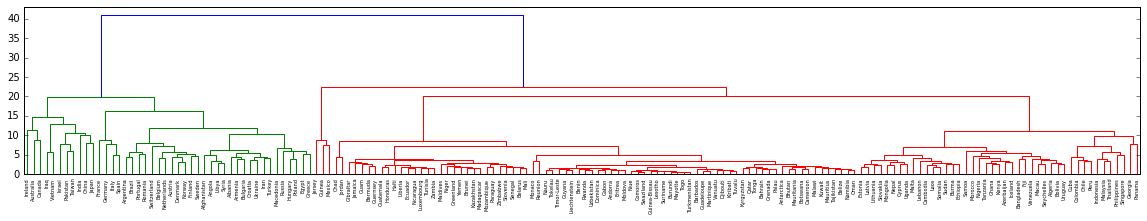

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy
from matplotlib.pyplot import show
from scipy.cluster.hierarchy import ward, dendrogram

namelist,npxarray = getallvec()
result_w = scipy.cluster.hierarchy.ward(npxarray)
plt.figure(figsize=(20, 3))
dendrogram(result_w, labels=namelist)
plt.savefig('data/98.png', dpi=300)

## 99. t-SNEによる可視化

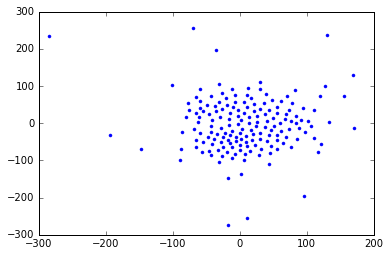

In [13]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

namelist, npxarray = getallvec()
model = TSNE(n_components=2)
tsne_result = model.fit_transform(npxarray)
plt.plot(tsne_result[:,0], tsne_result[:,1], ".")
plt.show()